In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc          # for Mac
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 문구 off
import warnings
warnings.filterwarnings('ignore')

# 1. Project_01_Digits

## (1) 데이터 이해하기

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
print(digits.data)   # 데이터 : 총 1797개 / 각 데이터는 64개의 숫자로 이루어짐

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [6]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


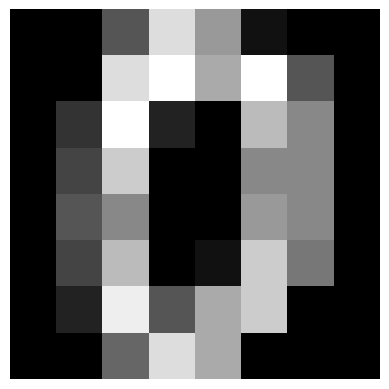

In [7]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

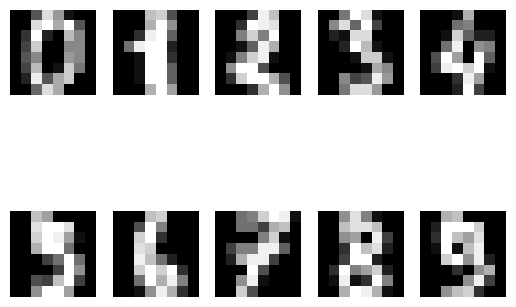

In [8]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해줌
plt.show()

In [9]:
digits_label = digits.target  # 각 이미지가 나타내는 숫자를 의미함
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
digits = pd.DataFrame(digits.data, columns=digits.feature_names)
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## (2) 다양한 모델로 학습시켜 보기

### - 1) Decision Tree Model

In [11]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
digits = load_digits()
digits_data = digits.data 
digits_target = digits.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_target, test_size=0.2, random_state=7) 

# (4) 모델 학습 및 예측
dt = DecisionTreeClassifier(random_state=32)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)
print(classification_report(y_test, y_predict)) # y_test(정답지), y_predict(예측값)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [12]:
# 오차 행렬 (confusion matrix)
# : 이진 분류에서 성능 지표로 활용되며, 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고
#   있는지도 함께 보여주는 지표
#__________________________________________________
#__________________________________________________
#            양성이라고 예측         음성이라고 예측
# ________________________________________________
# 실제 양성    양성 예측이 맞음        음성 예측이 틀림
#          (True Positive)      (False Negative)
# ________________________________________________
# 실제 음성   양성 예측이 틀림         음성 예측이 맞음
#          (False Positive)     (True Negative)
#__________________________________________________
#__________________________________________________

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))    # 0~9

[[42  0  0  1  0  0  0  0  0  0]
 [ 0 34  3  1  0  1  1  0  0  2]
 [ 0  0 33  2  0  0  1  1  2  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 0  0  1  0 35  0  0  0  1  0]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0  1  2  1  0 27  0  2]
 [ 0  5  4  1  1  0  3  0 28  1]
 [ 0  1  1  2  2  1  0  0  0 25]]


In [13]:
# 오차 행렬에서 나타나는 성능 지표 다섯 가지 

# (1) accuracy(정확도)
#      : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
#        (TN+TP) / (TN+FP+FN+TP)
# (2) precision(정밀도)
#      : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 의미
#       TP / (FP+TP)
# (3) recall(재현율)
#     : 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 의미
#       TP / (FN+TP)
# (4) f1 Score(정밀도와 재현율의 가중 조화평균)
# (5) Support(각 라벨의 실제 샘플 개수)
#      ex) 0 라벨의 개수: 43
#          1 라벨의 개수: 42
#          2 라벨의 개수: 40
# (6) macro avg 
#     : 각 클래스 별로 동일한 가중치를 부여. 즉 샘플 개수의 불균형을 고려하지 않음.
#       f1-macro-avg를 예로 들면 0부터 9까지 라벨의 f1-score 10개를 모두 더한 뒤 10을 나누면 됨
#       (0.99+0.81+0.80+0.85+0.89+0.93+0.88+0.89+0.75+0.78) / 10 = 0.86
#       샘플 개수의 불균형을 고려하지 않기 때문에 소수 클래스에 대한 성능이 낮을 때 더 큰 페널티가 발생 
# (7) weighted avg
#     : 각 클래스에 속하는 표본의 개수로 가중 평균을 내서 계산하는 방법
#       샘플 개수의 불균형을 고려
#       가중 평균을 수행하기 때문에 샘플의 개수가 적은 클래스의 영향력이 감소

#(출처) [1] classification_report로 평가 지표 확인하기|작성자 6시 내 교양

### - 2) Random Forest Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습 및 예측
rf = RandomForestClassifier(random_state=32)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [15]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  0  0  0  1  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  1]
 [ 0  3  0  0  1  1  0  2 36  0]
 [ 0  0  0  0  0  2  0  0  0 30]]


### - 3) SVM Model
: Support Vector Machine

In [16]:
from sklearn import svm

# 모델 학습 및 예측
svm = svm.SVC()
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [17]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  0  0  1  0  0  0 31]]


### - 4) SGD Classifier Model
: Stochastic Gradient Descent Classifier (경사하강법)

In [18]:
from sklearn.linear_model import SGDClassifier

# 모델 학습 및 예측
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_predict = sgd.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.90      0.86      0.88        42
           2       1.00      1.00      1.00        40
           3       0.93      0.82      0.87        34
           4       1.00      0.95      0.97        37
           5       0.70      1.00      0.82        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.97      0.86      0.91        43
           9       0.88      0.94      0.91        32

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



In [19]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  1  0  3  0  0  0  2]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  4  0  1  0  1]
 [ 0  0  0  0 35  0  1  0  0  1]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  1  0  0  0  0 26  0  1  0]
 [ 0  0  0  1  0  0  0 32  0  0]
 [ 0  3  0  0  0  3  0  0 37  0]
 [ 0  0  0  0  0  2  0  0  0 30]]


### - 5) Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

# 모델 학습 및 예측
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [21]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  1  1]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  1  0]
 [ 0  0  0  0  0  0 27  0  1  0]
 [ 0  0  0  1  0  0  0 32  0  0]
 [ 0  2  1  0  1  4  0  0 35  0]
 [ 0  0  0  1  0  2  0  0  0 29]]


## (3) 모델 평가

예측도가 높은 순으로 모델을 선택하면 아래의 순서가 된다.

SVM Model → Random Forest Model → Logistic Regression Model → SGD Classifier Model → Decision Tree Model

1. SVM Model 사용

: 데이터 내에 오차가 거의 없으며 accuracy, macro avg, weighted avg 모두 0.99의 값이 나온다. 

(단, 아래의 단점을 고려할 시 예측도가 높은 후순위 모델의 가중 평균를 비교하여 모델을 선택할 수 있다.)

_______________________________________________________________________


Cf)

SVM이란?
SVM은 Support Vector와 Hyper(초평면)을 이용해서 분류를 수행하게 되는 알고리즘으로, Hyperplane으로 경계를 나누어 분류하는 방식이다.

SVM의 장점
: 범주나 수치 예측 문제에 사용 가능하며, 오류 데이터에 대한 영향이 없고, 과적합 되는 경우가 적으며 신경망보다 사용하기 쉽다.

SVM의 단점 
: 최적이 모델을 찾기 위해서 커널과 모델에서 다양한 테스트가 필요하여 여러 연산이 필요하고, 입력 데이터 셋이 많을 경우 학습 속도가 느리다.



(출처) [2] https://muzukphysics.tistory.com/entry/ML-8-머신러닝-SVM-기본-개념과-장단점-Support-Vector-Machine

# 2. Project_02_Wine

## (1) 데이터 이해하기

In [22]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [23]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [24]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [25]:
wine = pd.DataFrame(wine.data, columns=wine.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## (2) 다양한 모델로 학습시켜 보기

### - 1) Decision Tree Model

In [26]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
wine = load_wine()
wine_data = wine.data 
wine_target = wine.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size=0.2, random_state=7) 

# (4) 모델 학습 및 예측
dt = DecisionTreeClassifier(random_state=32)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)
print(classification_report(y_test, y_predict)) # class_0, class_1, class_2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



In [27]:
print(wine_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [28]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[ 7  0  0]
 [ 0 17  0]
 [ 0  2 10]]


### - 2) Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습 및 예측
rf = RandomForestClassifier(random_state=32)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [30]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[ 7  0  0]
 [ 0 17  0]
 [ 0  0 12]]


### - 3) SVM Model
: Support Vector Machine

In [31]:
from sklearn import svm

# 모델 학습 및 예측
svm = svm.SVC()
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



In [32]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
y_predict
print(confusion_matrix(y_test, y_predict))

[[ 6  0  1]
 [ 1 15  1]
 [ 0 11  1]]


### - 4) SGD Classifier Model
: Stochastic Gradient Descent Classifier (경사하강법)

In [33]:
from sklearn.linear_model import SGDClassifier

# 모델 학습 및 예측
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_predict = sgd.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.00      0.00      0.00        17
           2       0.35      1.00      0.52        12

    accuracy                           0.39        36
   macro avg       0.45      0.43      0.32        36
weighted avg       0.31      0.39      0.26        36



In [34]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[ 2  0  5]
 [ 0  0 17]
 [ 0  0 12]]


### - 5) Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression

# 모델 학습 및 예측
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



In [36]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[ 6  1  0]
 [ 0 17  0]
 [ 0  0 12]]


## (3) 모델 평가

예측도가 높은 순으로 모델을 선택하면 아래의 순서가 된다.

Random Forest Model → Logistic Regression Model → Decision Tree Model → SGD Classifier Model → SVM Model

1. Random Forest Model 사용

데이터 내에 오차가 없으므로 오차 행렬의 성능 지표 중 어떤 것을 사용해도 1.0이 나온다. 단, Random Forest Model의 특성상 데이터 크기에 비례해서 수 백 ~ 수 천 개의 트리를 형성하기에 예측에 오랜 시간이 걸릴 수 있다.


2. SGD Classifier Model과 SVM Model은 예측도가 떨어지므로 사용하지 않는 것이 좋다.

# 3. Project_03_Breast_Cancer

## (1) 데이터 이해하기

In [37]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [39]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [40]:
bc = pd.DataFrame(bc.data, columns=bc.feature_names)
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## (2) 다양한 모델로 학습시켜 보기

### - 1) Decision Tree Model

In [41]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
bc = load_breast_cancer()
bc_data = bc.data 
bc_target = bc.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(bc_data, bc_target, test_size=0.2, random_state=7) 

# (4) 모델 학습 및 예측
dt = DecisionTreeClassifier(random_state=32)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [42]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))    # malignant, benign

[[33  7]
 [ 3 71]]


### - 2) Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습 및 예측
rf = RandomForestClassifier(random_state=32)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [44]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[40  0]
 [ 0 74]]


### - 3) SVM Model
: Support Vector Machine

In [45]:
from sklearn import svm

# 모델 학습 및 예측
svm = svm.SVC()
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [46]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[29 11]
 [ 0 74]]


### - 4) SGD Classifier Model
: Stochastic Gradient Descent Classifier (경사하강법)

In [47]:
from sklearn.linear_model import SGDClassifier

# 모델 학습 및 예측
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_predict = sgd.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.86      1.00      0.92        74

    accuracy                           0.89       114
   macro avg       0.93      0.85      0.87       114
weighted avg       0.91      0.89      0.89       114



In [48]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[28 12]
 [ 0 74]]


### - 5) Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression

# 모델 학습 및 예측
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [50]:
# 오차 행렬 (confusion matrix)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[34  6]
 [ 0 74]]


## (3) 모델 평가

예측도가 높은 순으로 모델을 선택하면 아래의 순서가 된다.

Random Forest Model → Logistic Regression Model → Decision Tree Model → SVM Model → SGD Classifier Model

1. Random Forest Model 사용
데이터 내에 오차가 없으므로 오차 행렬의 성능 지표 중 어떤 것을 사용해도 1.0이 나온다.
단, Random Forest Model의 특성상 데이터 크기에 비례해서 수 백 ~ 수 천 개의 트리를 형성하기에 예측에 오랜 시간이 걸릴 수 있다.


2. 시간과 비용을 고려하여 다른 Model을 사용한다면 후순위를 따르되,
암 판단 모델의 특성상 "암환자에게 암이 아니라고 예측한 경우"가 최악의 케이스이므로
실제 암인 환자 중에서 암을 예측한 확률이 높은 Model을 사용한다.
정밀도는 FP를 낮추는데 초점을 두고 있고, 재현율은 FN을 낮추는데 초점을 두므로
이 경우에는 재현율이 높은 모델을 사용한다.


3. accuracy, macro avg, weighted avg 중에서는 샘플 개수의 불균형을 고려하여 가중 평균을 수행하는 weighted avg의 수치를 기준으로 모델을 선택한다.
단, 위의 자료는 적은 표본의 수로 인해 각 모델별 accuracy, macro avg, weighted avg 중 어떤 지표를 활용해도 오차 확률 지표 순위가 동일하다.


4. 만약 평가 모델 간에도 accuracy, macro avg, weighted avg의 차이가 있다면 샘플 개수의 불균형을 고려하여 weighted avg를 사용하고 또한 암 판단 모델의 특성상 재현율(recall)이 높은 모델을 사용하므로, 재현율(recall)의 weighted avg가 가장 높은 모델을 활용하는 것이 좋다.

# 5. 결론

  본 분석에서는 sklearn.dataset에서 제공하는 Built-in 데이터 중 load_digits(손글씨 데이터), load_wine(와인 데이터), load_breast_cancer(유방함 환자 데이터)를 분석하였다.

이를 위해, (1) 필요한 모듈 import → (2) 데이터 준비 (sklearn의 built-in 데이터) → (3) 데이터 이해하기 → (4) train, test 데이터 분리 → (5) 5가지 모델로 학습시켜 보기(Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression) → (6) 5가지 모델 중 분석에 활용할 최적 모델 찾기의 과정을 거쳤다.

그 결과 load_digits(손글씨 데이터), load_wine(와인 데이터), load_breast_cancer(유방함 환자 데이터) 모두 Random Forest Model을 활용하는 것이 최적으로 분석되었다.

# 6. References

[1] classification_report로 평가 지표 확인하기|작성자 6시 내 교양

[2] https://muzukphysics.tistory.com/entry/ML-8-머신러닝-SVM-기본-개념과-장단점-Support-Vector-Machine

[3] https://lms.aiffel.io/course/382/node/497/step/3363/readonly